# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

# Loading dataset

In [7]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12,Unnamed: 13
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN,NaN
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,NaN,NaN
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,NaN,NaN
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,NaN,NaN
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,NaN,NaN
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,NaN,NaN
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,NaN,NaN
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,NaN,NaN


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12,Unnamed: 13
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,0.0,0.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,NaN,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,NaN,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,NaN,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,NaN,NaN
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,NaN,NaN


In [9]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data Preprocessing

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [11]:
df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [12]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [13]:
df.isnull().sum()

fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
Unnamed: 12             1599
Unnamed: 13             1599
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32>

C:\Users\PAVILION\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

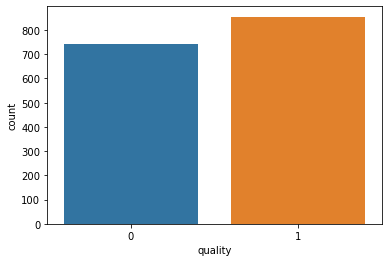

In [15]:
sns.countplot(df['quality'])

In [16]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12,Unnamed: 13


In [17]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.095093
volatile acidity       -0.321441
citric acid             0.159129
residual sugar         -0.002160
chlorides              -0.109494
free sulfur dioxide    -0.061757
total sulfur dioxide   -0.231963
density                -0.159110
pH                     -0.003264
sulphates               0.218072
alcohol                 0.434751
Unnamed: 12                  NaN
Unnamed: 13                  NaN
Name: quality, dtype: float64


# DATA VISUALIZATION

# Bivariate Analysis

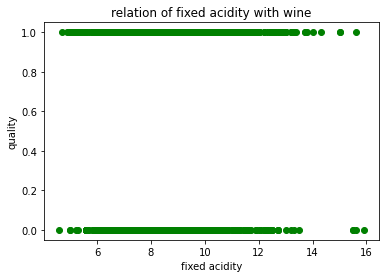

In [18]:
plt.scatter(df['fixed acidity'], df['quality'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.show()

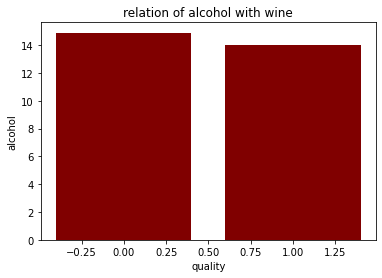

In [19]:
plt.bar(df['quality'],df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

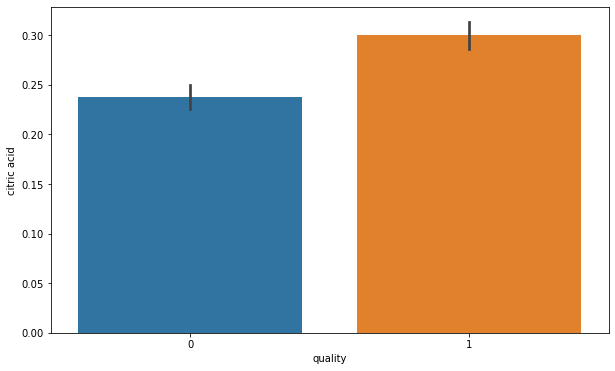

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

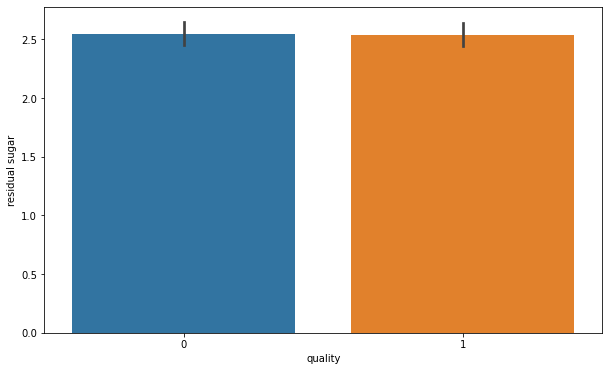

In [21]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

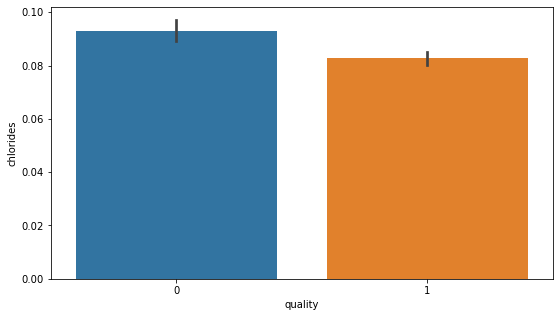

In [22]:
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

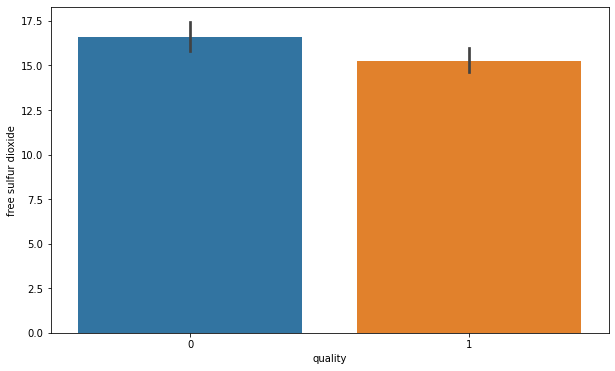

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

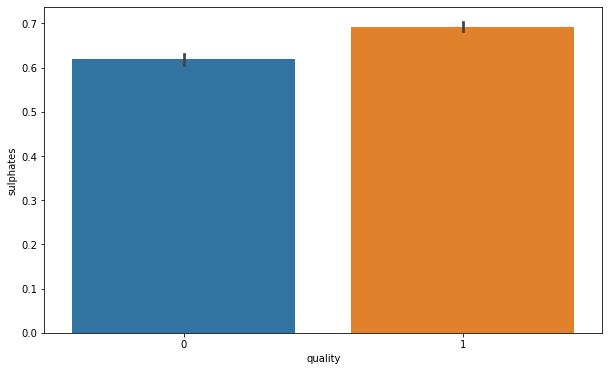

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

C:\Users\PAVILION\AppData\Local\Temp/ipykernel_25876/2226018453.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

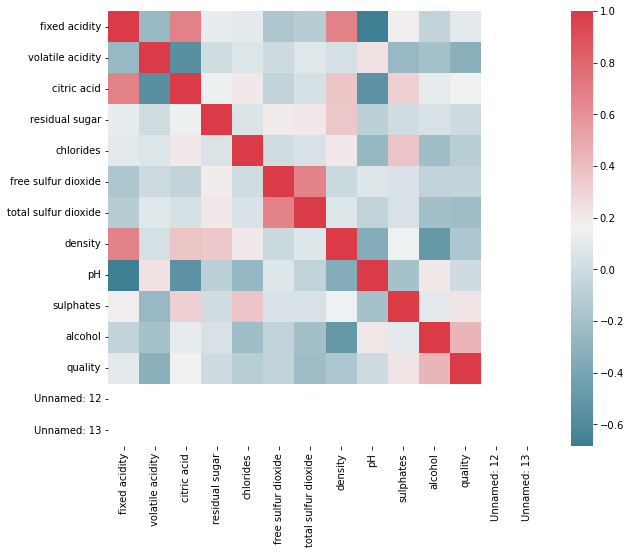

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

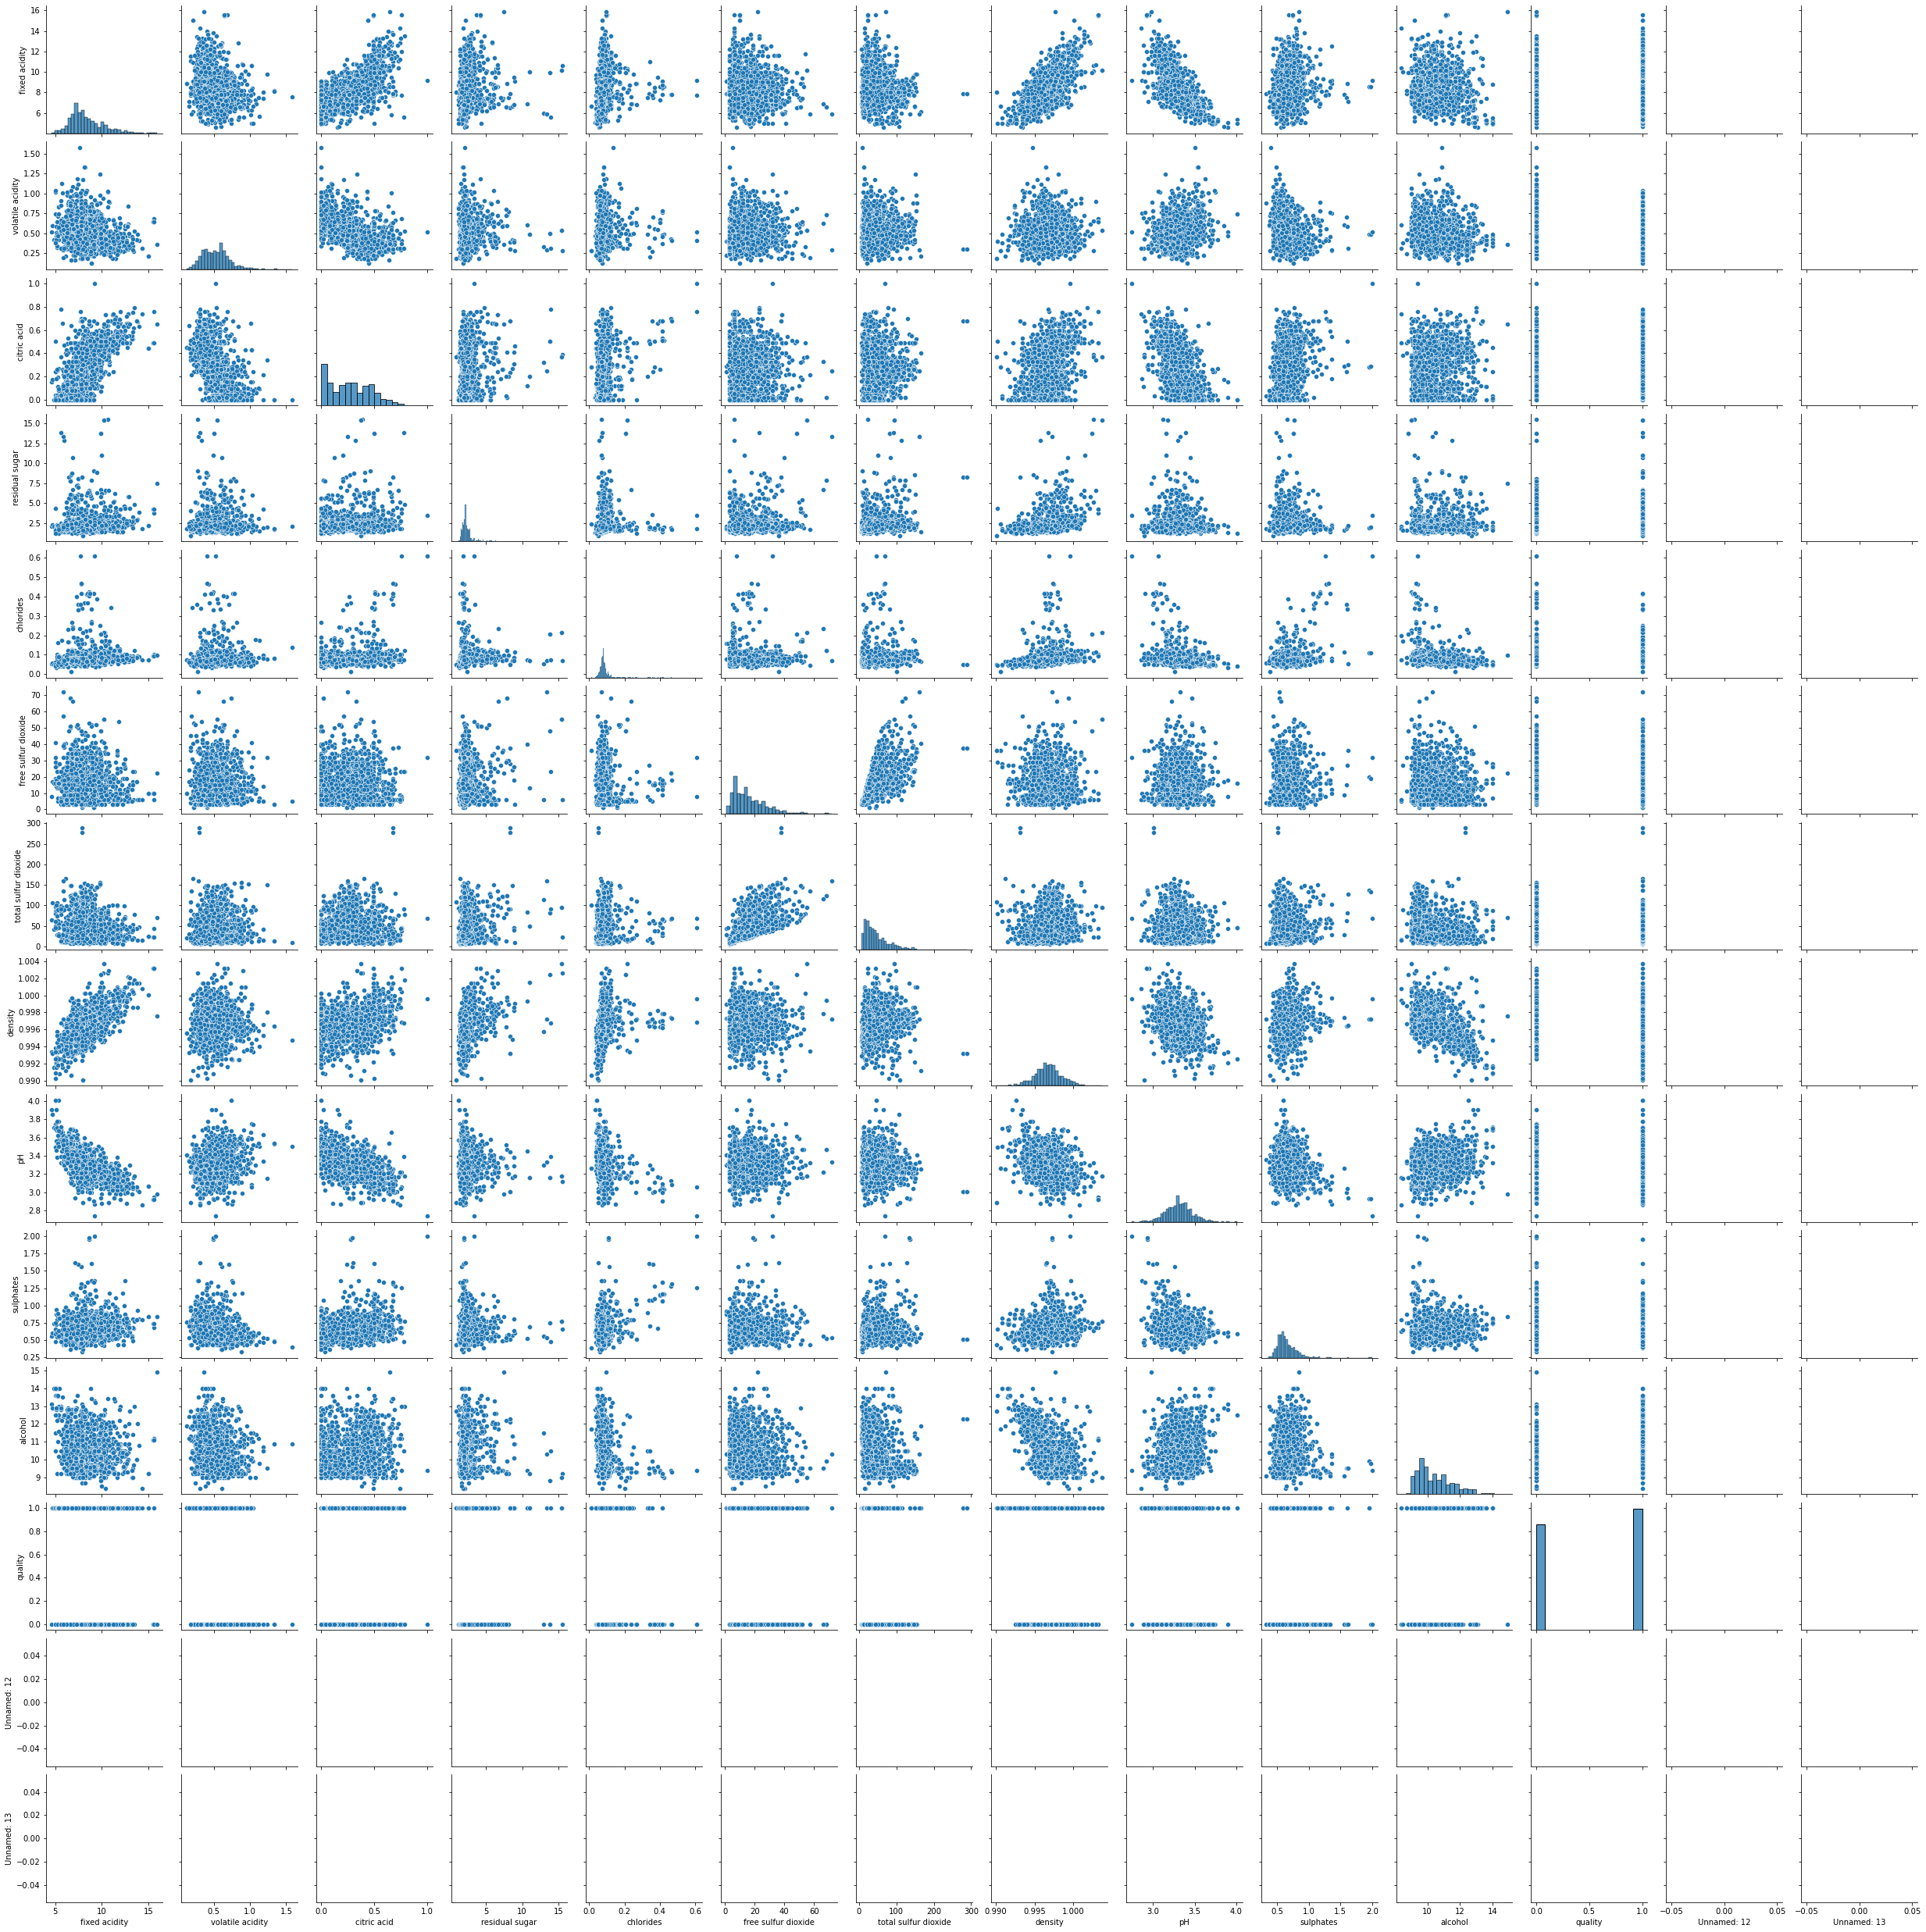

In [27]:
sns.pairplot(df)

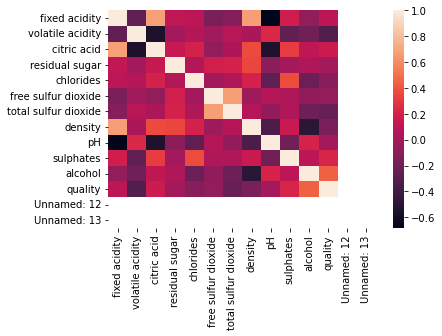

In [28]:
sns.heatmap(df.corr())
plt.show()

In [29]:
x = df.iloc[:,:11]
y = df.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [31]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [32]:
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [33]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,0.71,10.2


In [34]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 9)
(1199,)
(400, 9)
(400,)


# MODELLING

# LINEAR REGRESSION

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [37]:
y_test.shape

(400,)

In [38]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [39]:
regressor.coef_

array([ 2.51580047e-02, -5.04202720e-01, -1.34156889e-01, -4.90728219e-01,
        5.05619094e-03, -3.21349887e-03, -4.13609107e+00,  4.71060868e-01,
        1.59325005e-01])

In [40]:
train_pred = regressor.predict(x_train)
train_pred

array([0.38110738, 0.41242084, 0.67191181, ..., 0.93232549, 0.8398785 ,
       0.31917243])

In [41]:
test_pred = regressor.predict(x_test)
test_pred

array([ 0.18288523,  0.527231  ,  0.74343638,  0.83512508,  0.18504485,
        0.49028974,  0.30282158,  0.79175463,  0.46487452,  0.68607419,
        0.54087627,  0.2047971 ,  0.27287316,  0.32693016,  0.98408498,
        0.26269529,  0.67523962,  0.21782515,  0.68098793,  0.92392193,
        0.95868607,  0.3692614 ,  0.66816559,  0.22744044,  0.31906199,
        0.46125912,  0.24073228,  0.89019667,  0.68980843,  0.63308547,
        0.78295324,  0.91109714,  0.15471271,  0.69736086,  0.32852737,
        0.67601922,  1.21953544,  0.07508909,  0.33367676,  0.69736086,
        0.33730579,  0.06872406,  0.9968302 ,  0.4556205 ,  0.35980174,
        0.58725344,  0.63403831,  0.33888035,  0.34858457,  0.45948238,
        0.28004225,  0.50987417,  0.77694199,  0.89738302,  0.42164149,
        0.44005273,  0.27273588,  0.04412497,  0.20910818,  0.24756496,
       -0.03382242,  0.35689854,  0.3145785 ,  0.52764085,  0.68852279,
        0.99954072,  0.385784  ,  0.59123901,  0.31161787,  0.72

In [42]:
predicted_data = np.round_(test_pred)
predicted_data

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,
        1.,  1.,  1.,  0., -0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  0., -0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.36350195282999354
Mean Squared Error: 0.17290186266846064
Root Mean Squared Error: 0.4158146975137611


# LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.74395329441201
Testing accuracy : 0.7375
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       183
           1       0.78      0.71      0.75       217

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400

[[140  43]
 [ 62 155]]


C:\Users\PAVILION\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Stochastic Gradient Descent Classifier

In [45]:
from sklearn.linear_model import SGDClassifier

# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.89      0.69       183
           1       0.82      0.43      0.56       217

    accuracy                           0.64       400
   macro avg       0.70      0.66      0.63       400
weighted avg       0.71      0.64      0.62       400



In [46]:
print("Train accuracy :",model.score(x_train, y_train))
print("Testing accuracy:", model.score(x_test, y_test))

Train accuracy : 0.6880733944954128
Testing accuracy: 0.64


# Support Vector Machine

In [47]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.6430358632193495
Testing accuracy : 0.6175


In [48]:
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
grid_svc.fit(x_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

# Decision Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

# Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (200, 150), max_iter = 150)

# feeding the training data to the model
model.fit(x_train, y_train)

# calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))